In [2]:
import pandas as pd

In [4]:
df=pd.read_csv('IMDB Dataset.csv')
df=df.drop(df.index[20000: 50000])
df.describe()
print("hii")

hello


In [110]:
print(df)

                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
19995  ok. for starters, taxi driver is amazing. this...  negative
19996  It's sort of hard for me to say it, because I ...  negative
19997  I still liked it though. Warren Beatty is only...  positive
19998  We could still use Black Adder even today. Ima...  positive
19999  This so-called "documentary" tries to tell tha...  negative

[20000 rows x 2 columns]


In [111]:
df.columns


Index(['review', 'sentiment'], dtype='object')

# cheking how many value is empty


In [112]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

# checking the duplicated values

In [113]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
19995    False
19996    False
19997    False
19998    False
19999    False
Length: 20000, dtype: bool

In [114]:
df.describe()

,review,sentiment
count,20000,20000
unique,19926,2
top,Loved today's show!!! It was a variety and not...,negative
freq,4,10097


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     20000 non-null  object
 1   sentiment  20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


# making report using pandas profiling 

In [424]:
from pandas_profiling import ProfileReport
prof=ProfileReport(df)
prof.to_file(output_file='movies reviews.html')


C:\Users\lenovo\AppData\Local\Temp\ipykernel_4368\2354459053.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# some graphical analysis using matplotlib and seaborn

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

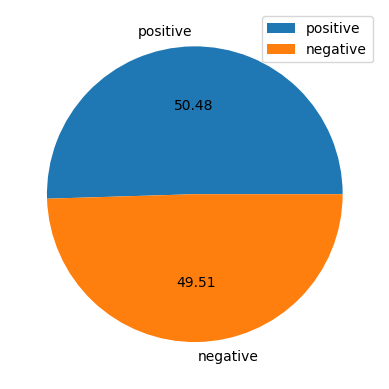

In [117]:

plt.pie(df['sentiment'].value_counts(), labels=['positive','negative'],autopct='%0.2f')
plt.legend()
plt.show()


In [118]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# feature construction

In [119]:
l1=[]
l2=[]
def extract_word(text):
    for word in text.split():
        l1.append(word)
    return len(l1)
def extract_sentence(text):
    for sent in text.split('.'):
        l2.append(sent)
    return len(l2)

In [120]:
# df['number_chars']=df['review'].apply(len)
# df['number_words']=df['review'].apply(extract_word)
# df['number_sentence']=df['review'].apply(extract_sentence)
# df.head()

# step 1 text preprocessing

# converting upper case to lower case

In [121]:
df['review']=df['review'].str.lower()
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. <br /><br />the...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


# html tag removal

In [122]:
import re
# def html_tag_removal(text):
#     patt=re.compile('<,*?>')
#     return patt.sub(r'', text)

# df['review']=df['review'].apply(html_tag_removal)
# df['review'][0]
df['review']=df['review'].str.replace('<br />','')
df['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.i would say the main appeal of the show is due to the fact that it goes where other shows wo

# removing punctuation

In [123]:
import string 
punc=string.punctuation
# c="'";
# punc=punc.replace(c,'')
print(punc)
def punctuation(text):
    for char in punc:
        text=text.replace(char,' ')
    return text

# df['review']=df['review'].apply(punctuation)
# df['review'][0]

# def punctuation(text):
#     return text.translate(str.maketrans('','',punc))

df['review']=df['review'].apply(punctuation)
df['review'][0]


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


'one of the other reviewers has mentioned that after watching just 1 oz episode you ll be hooked  they are right  as this is exactly what happened with me the first thing that struck me about oz was its brutality and unflinching scenes of violence  which set in right from the word go  trust me  this is not a show for the faint hearted or timid  this show pulls no punches with regards to drugs  sex or violence  its is hardcore  in the classic use of the word it is called oz as that is the nickname given to the oswald maximum security state penitentary  it focuses mainly on emerald city  an experimental section of the prison where all the cells have glass fronts and face inwards  so privacy is not high on the agenda  em city is home to many  aryans  muslims  gangstas  latinos  christians  italians  irish and more    so scuffles  death stares  dodgy dealings and shady agreements are never far away i would say the main appeal of the show is due to the fact that it goes where other shows wo

# removing stopwords

In [124]:
# from nltk.corpus import stopwords
# stopwords.words('english')
from sklearn.feature_extraction import text

print(text.ENGLISH_STOP_WORDS)

def remove_stopwords(data):
    stopwords=[]
    for stopword in data.split():
        if stopword in text.ENGLISH_STOP_WORDS:
            stopwords.append('')
        else:
            stopwords.append(stopword)
#     x=stopwords[:]
#     print(stopwords)
#     stopwords.clear()
    return " ".join(stopwords)

df['review']=df['review'].apply(remove_stopwords)
df['review'][0]

frozenset({'co', 'whenever', 'seeming', 'seems', 'whose', 'very', 'whereas', 'towards', 'cannot', 'however', 'already', 'with', 'throughout', 'together', 'thereby', 'full', 'everything', 'hereafter', 'from', 'five', 'three', 'your', 'becoming', 'no', 'hasnt', 'myself', 'ten', 'even', 'hereupon', 'an', 'both', 'nowhere', 'around', 'detail', 'as', 'hundred', 'sincere', 'seemed', 'keep', 'per', 'couldnt', 'their', 'nothing', 'what', 'enough', 'while', 'once', 'none', 'only', 'otherwise', 'nobody', 'herself', 'although', 'front', 'eight', 'down', 'too', 'nor', 'up', 'within', 'anyhow', 'then', 'has', 'see', 'perhaps', 'found', 'if', 'against', 'alone', 'next', 'noone', 'besides', 'interest', 'therein', 'four', 'of', 'empty', 'always', 'each', 'me', 'ours', 'themselves', 'how', 'further', 'except', 'bottom', 'again', 'elsewhere', 'wherein', 'therefore', 'some', 'sometime', 'part', 'than', 'name', 'until', 'ltd', 'thus', 'more', 'will', 'is', 'else', 'moreover', 'third', 'on', 'here', 'thru'

'    reviewers  mentioned   watching just 1 oz episode  ll  hooked   right    exactly  happened     thing  struck   oz   brutality  unflinching scenes  violence  set  right   word  trust         faint hearted  timid   pulls  punches  regards  drugs sex  violence   hardcore   classic use   word   called oz     nickname given   oswald maximum security state penitentary  focuses mainly  emerald city  experimental section   prison    cells  glass fronts  face inwards  privacy   high   agenda em city  home   aryans muslims gangstas latinos christians italians irish    scuffles death stares dodgy dealings  shady agreements   far away   say  main appeal        fact   goes   shows wouldn t dare forget pretty pictures painted  mainstream audiences forget charm forget romance oz doesn t mess    episode   saw struck    nasty   surreal  couldn t say   ready      watched   developed  taste  oz  got accustomed   high levels  graphic violence  just violence  injustice crooked guards  ll  sold    nick

# chaging the order of columns

In [125]:
# df.head()
# df=df.iloc[:,[0,2,3,4,1]]
# df.head()

# transformation on columns

# 1- label encoder for sentiment column

In [126]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(df['sentiment'])
Y

array([1, 1, 1, ..., 1, 1, 0])

# 2- bag of words(count vectorizer)

In [127]:
# from sklearn.feature_extraction.text import CountVectorizer
# bow=CountVectorizer()

# split the data frame into 2 part

In [130]:
# X=df.iloc[:,0: 4]
# X=bow.fit_transform(df['review']).toarray()
# X.shape

# calculating tf and idf using TfidfVectorizer()

In [131]:
from sklearn.feature_extraction.text import TfidfVectorizer
X=df.iloc[:,0:4]
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(df['review']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [132]:
print(len(tfidf.idf_))

70531


In [133]:
tfidf.vocabulary_

{'reviewers': 52303,
 'mentioned': 39704,
 'watching': 68111,
 'just': 33710,
 'oz': 45077,
 'episode': 20930,
 'll': 36792,
 'hooked': 29698,
 'right': 52575,
 'exactly': 21505,
 'happened': 28047,
 'thing': 62731,
 'struck': 60069,
 'brutality': 8904,
 'unflinching': 65641,
 'scenes': 54505,
 'violence': 67349,
 'set': 55605,
 'word': 69384,
 'trust': 64538,
 'faint': 22195,
 'hearted': 28550,
 'timid': 63135,
 'pulls': 49429,
 'punches': 49465,
 'regards': 51217,
 'drugs': 19070,
 'sex': 55677,
 'hardcore': 28096,
 'classic': 12043,
 'use': 66438,
 'called': 9686,
 'nickname': 42880,
 'given': 25972,
 'oswald': 44591,
 'maximum': 39028,
 'security': 55184,
 'state': 59311,
 'penitentary': 46223,
 'focuses': 23784,
 'mainly': 37966,
 'emerald': 20317,
 'city': 11931,
 'experimental': 21802,
 'section': 55169,
 'prison': 48716,
 'cells': 10702,
 'glass': 26033,
 'fronts': 24606,
 'face': 22109,
 'inwards': 32416,
 'privacy': 48727,
 'high': 29089,
 'agenda': 2039,
 'em': 20231,
 'home

# extracting tf and idf from dataset and storing it to file

In [134]:
file=open("Output.txt",'w',encoding="utf-8")
file.write("VOCABULARY  INVERSE_DOCUMENT_FREQUENCY  TERM_FREQUENCY  \n")

for vocab, idf in zip(tfidf.vocabulary_.keys(), tfidf.idf_):
    line= f"{vocab}            {idf} \n"
    file.write(line)
file.close()

#  train test split

In [135]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y, test_size=.2, random_state=2)
# x_train.shape
# x_test.shape
# y_train.shape
y_test.shape

MemoryError: Unable to allocate 8.41 GiB for an array with shape (16000, 70531) and data type float64

# models

# Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression
y_train=np.array(y_train).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)
y_train.shape

(8000, 1)

In [ ]:
# lr=LogisticRegression(C=0.1,n_jobs= -1, solver='saga',penalty='l2')
# lr.fit(x_train, y_train)
# y_pred=lr.predict(x_test)

N:\ml projects\tf-idf\tf-idf\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# multinomial naive bayes

In [100]:
from sklearn.naive_bayes import MultinomialNB  
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
y_pred=mnb.predict(x_test)

N:\ml projects\tf-idf\tf-idf\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Gaussian naive bayes

In [104]:
from sklearn.naive_bayes import GaussianNB  
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)

N:\ml projects\tf-idf\tf-idf\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# bernaulli nb

In [106]:
from sklearn.naive_bayes import BernoulliNB
nb=BernoulliNB()
nb.fit(x_train,y_train)
y_pred=nb.predict(x_test)

N:\ml projects\tf-idf\tf-idf\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# checking accuracy of the model

In [107]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

0.845
[[860 120]
 [190 830]]
0.8736842105263158


# accuracy of every model with bag of words

In [30]:
1- multinomial naive bayes
accuray: 0.841
precision: 0.8663883089770354

2- gaussian naive bayes
accuray: 0.6195
precision: 0.6547192353643967
    
3- bernoulli naive bayes
accuray: 0.8465
precision: 0.8709677419354839

SyntaxError: invalid syntax (3375451632.py, line 1)

# accuracy of every model with bag of words

In [56]:
1- multinomial naive bayes
accuracy: 0.8495
precision: 0.8804232804232804
    
2- gaussian
0.617
0.6322916666666667

3- bernoulli
0.8465
0.8709677419354839

SyntaxError: invalid syntax (3606582172.py, line 1)

In [136]:
!pip install streamlit


                                              0.0/8.9 MB ? eta -:--:--
                                              0.0/8.9 MB ? eta -:--:--
                                              0.0/8.9 MB ? eta -:--:--
                                              0.0/8.9 MB ? eta -:--:--
                                              0.0/8.9 MB ? eta -:--:--
                                              0.0/8.9 MB ? eta -:--:--
                                              0.0/8.9 MB ? eta -:--:--
                                              0.0/8.9 MB ? eta -:--:--
                                              0.0/8.9 MB ? eta -:--:--
                                              0.0/8.9 MB ? eta -:--:--
                                              0.0/8.9 MB ? eta -:--:--
                                              0.0/8.9 MB ? eta -:--:--
                                              0.0/8.9 MB ? eta -:--:--
                                              0.0/8.9 MB ? eta -:--:--
      

ERROR: Exception:
Traceback (most recent call last):
  File "N:\ml projects\tf-idf\tf-idf\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "N:\ml projects\tf-idf\tf-idf\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "N:\ml projects\tf-idf\tf-idf\lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "N:\ml projects\tf-idf\tf-idf\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 90, in read
    data = self.__fp.read(amt)
  File "N:\ml projects\lib\http\client.py", line 463, in read
    n = self.readinto(b)
  File "N:\ml projects\lib\http\client.py", line 507, in readinto
    n = self.fp.readinto(b)
  File "N:\ml projects\lib\socket.py", line 704, in readinto
    return self._sock.recv_into(b)
  File "N:\ml projects\lib\ssl.py", line 1241, in recv